In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

First fit experiment RNN seq2seq, explore lag, dropout and number of input neurons, number of layers and number of neurons in the fully connected layer

In [4]:

query={'experiment':'rnns2sfit'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'nlayers', 'full'], data=['lag'])

In [37]:
results.exp_df 

,hour,site,test,val,vars,ahead,lag,drop,neuronsE,neuronsD
0,1,78849,0.865394,0.870589,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
1,2,78849,0.743019,0.753512,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
2,3,78849,0.649351,0.665219,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
3,4,78849,0.576543,0.596704,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
4,5,78849,0.516925,0.538408,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
5,6,78849,0.466993,0.487516,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
6,7,78849,0.424470,0.441876,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
7,8,78849,0.386263,0.399504,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
8,9,78849,0.350945,0.362311,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32
9,10,78849,0.318721,0.328227,"[0, 1, 2, 3, 4, 5, 6]","[1, 12]",18,0.0,64,32


<Figure size 1200x800 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

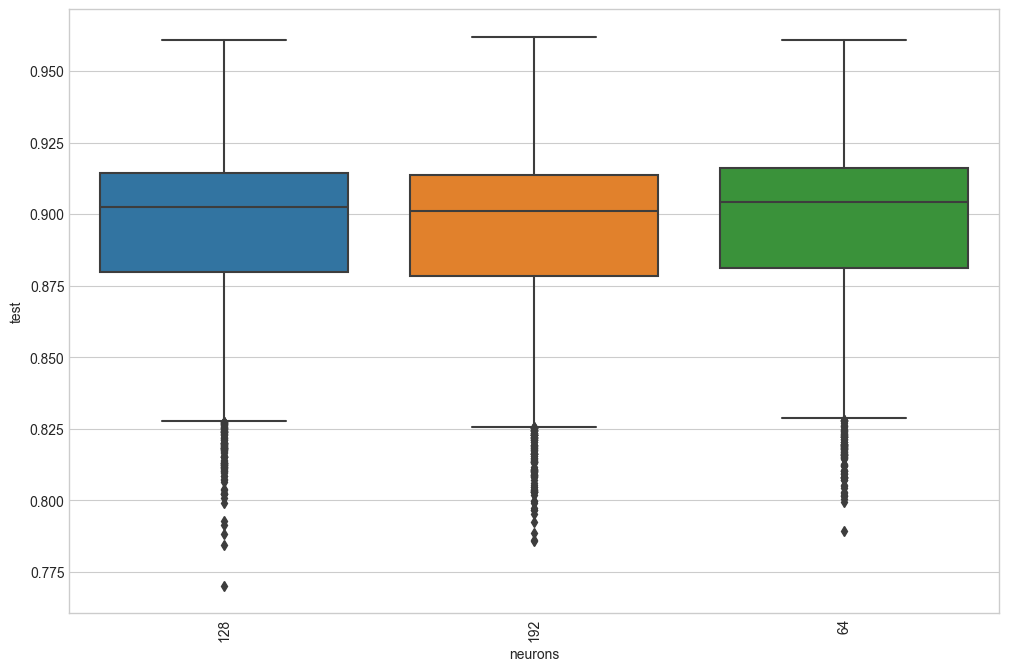

In [5]:
plt.figure(figsize=(12,8), dpi=100)
plt.style.use('seaborn-whitegrid')
plt.xticks(rotation=90)
sns.boxplot(x='neurons', y='test', data=results.exp_df[results.exp_df.hour==1])

In [6]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'nlayers', 'lag', 'full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a0a430828>,
      dtype=object)

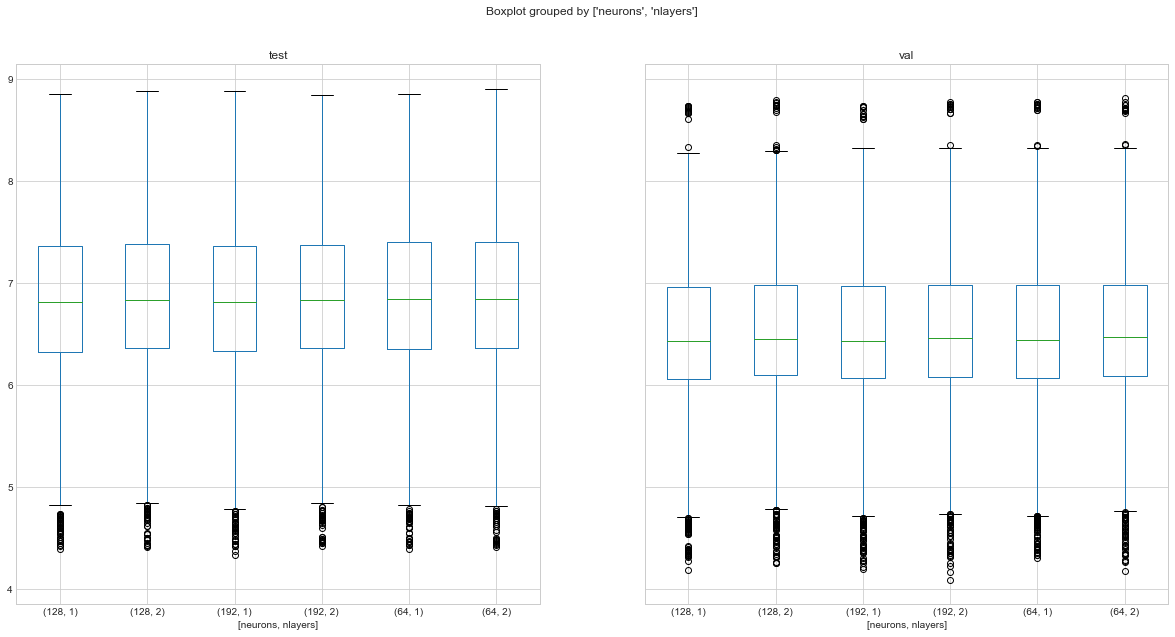

In [7]:
# plt.figure(figsize=(12,8), dpi=100)
# plt.style.use('seaborn-whitegrid')
# plt.xticks(rotation=90)
#sns.boxplot(x='neuronsD', by='dropout', y='test', data=a)
a.boxplot(by=['neurons', 'nlayers'],figsize=(20,10))

Selects the 500 best/worst results and plots in a map the sum of R² of all the hours for test and validation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a13c753c8>,
      dtype=object)

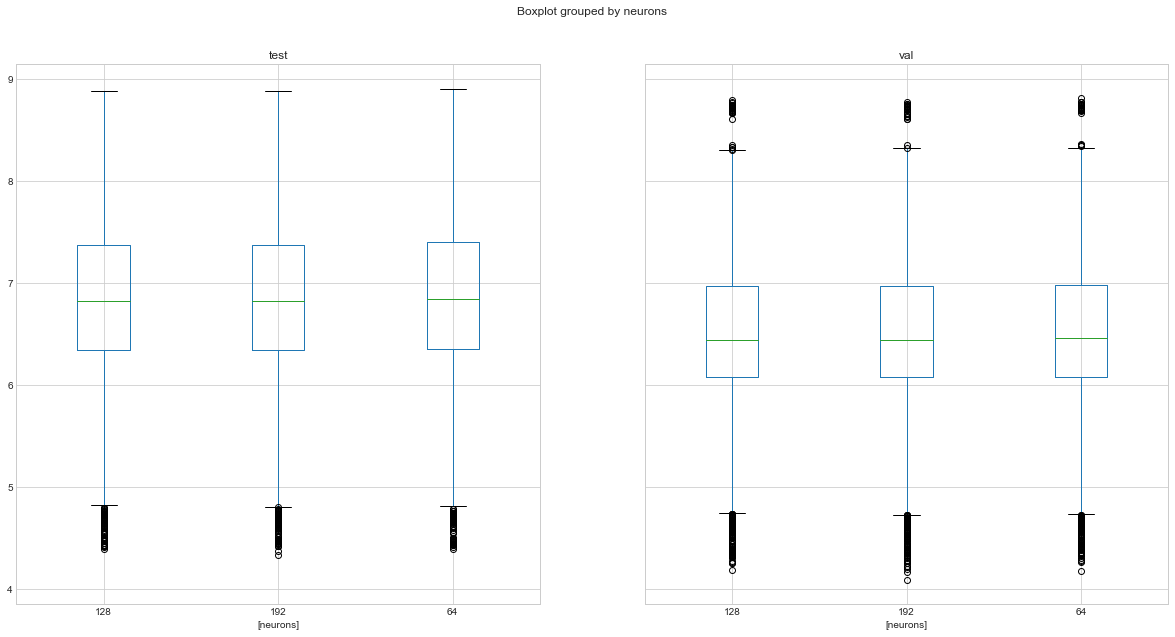

In [8]:
a.boxplot(by='neurons',figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a0b49d390>,
      dtype=object)

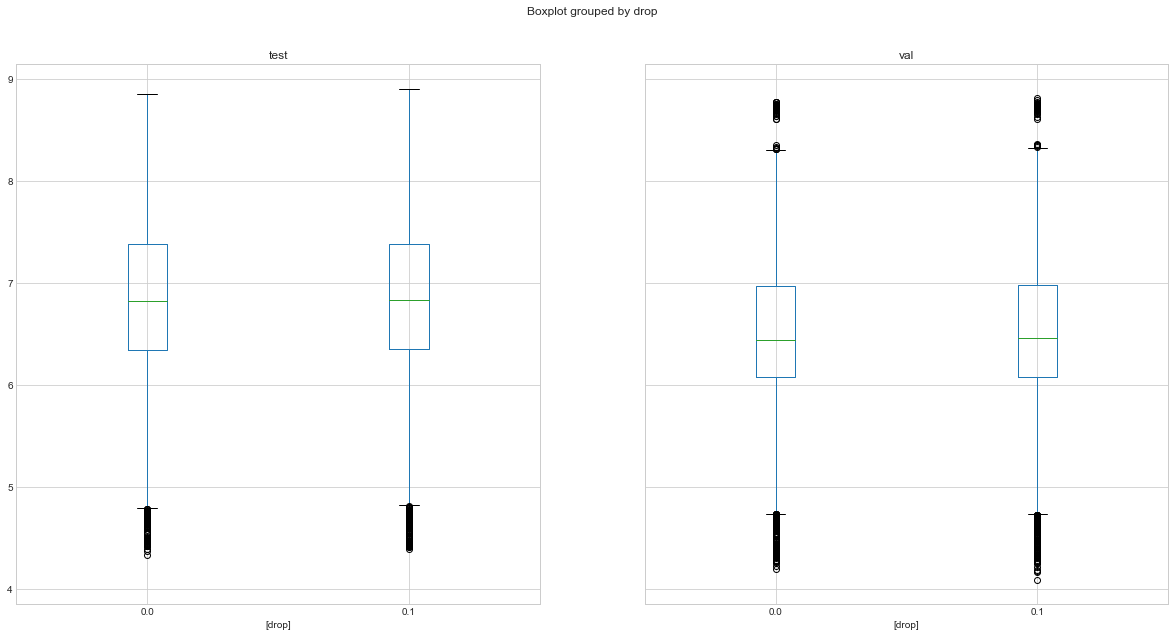

In [9]:
a.boxplot(by='drop',figsize=(20,10))

In [19]:
b =a.groupby(by=['neurons', 'nlayers', 'drop', 'lag', 'full'],as_index=False).mean()
b[b.neurons=='64'].style.highlight_max()

,neurons,nlayers,drop,lag,full,test,val
48,64,1,0.0,12,[128],6.81122,6.50493
49,64,1,0.0,12,[32],6.77719,6.47511
50,64,1,0.0,12,[64],6.80115,6.49167
51,64,1,0.0,18,[128],6.79477,6.47753
52,64,1,0.0,18,[32],6.75001,6.44591
53,64,1,0.0,18,[64],6.78488,6.46812
54,64,1,0.1,12,[128],6.82903,6.51836
55,64,1,0.1,12,[32],6.77834,6.47607
56,64,1,0.1,12,[64],6.79629,6.4962
57,64,1,0.1,18,[128],6.79688,6.4801


Best results  64/2/0.1/12/128

Second fit of RNN, explore type of unit, lag and some more neuronsE and neuronsD

In [44]:
query={'experiment':'rnnfit2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neuronsE', 'neuronsD', 'rnn'], data=['lag'])

In [77]:
a=results.exp_df.groupby(['site', 'drop', 'neuronsE', 'neuronsD', 'lag','rnn'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

,drop,neuronsE,neuronsD,lag,rnn,test,val
0,0.0,128,128,12,GRU,7.005152,6.705381
1,0.0,128,128,12,LSTM,6.895406,6.439959
2,0.0,128,128,18,GRU,6.956666,6.578427
3,0.0,128,128,18,LSTM,6.692719,6.531313
4,0.0,128,128,24,GRU,6.907696,6.445188
5,0.0,128,128,24,LSTM,6.609967,6.336705
6,0.0,128,128,6,GRU,7.120734,6.722235
7,0.0,128,128,6,LSTM,6.950067,6.609769
8,0.0,128,64,12,GRU,6.967574,6.612715
9,0.0,128,64,12,LSTM,6.813341,6.584594


In [47]:
b =a.groupby(by=['neuronsD', 'neuronsE', 'drop', 'lag','rnn'],as_index=False).mean()

In [53]:
b.describe(include='all')

,neuronsD,neuronsE,drop,lag,rnn,test,val
count,192,192,192,192,192,192.000000,192.000000
unique,3,4,2,4,2,NaN,NaN
top,96,256,0.1,24,LSTM,NaN,NaN
freq,64,48,96,48,96,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.715054,6.401622
std,NaN,NaN,NaN,NaN,NaN,0.066117,0.062510
min,NaN,NaN,NaN,NaN,NaN,6.591258,6.277024
25%,NaN,NaN,NaN,NaN,NaN,6.664541,6.353330
50%,NaN,NaN,NaN,NaN,NaN,6.712954,6.399413
75%,NaN,NaN,NaN,NaN,NaN,6.772341,6.449905


In [81]:
b[b.neuronsD=='128'].style.highlight_max()

,neuronsD,neuronsE,drop,lag,rnn,test,val
0,128,128,0.0,12,GRU,6.81623,6.49497
1,128,128,0.0,12,LSTM,6.73749,6.42588
2,128,128,0.0,18,GRU,6.81431,6.49696
3,128,128,0.0,18,LSTM,6.707,6.39219
4,128,128,0.0,24,GRU,6.80364,6.48031
5,128,128,0.0,24,LSTM,6.68136,6.35348
6,128,128,0.0,6,GRU,6.7892,6.46975
7,128,128,0.0,6,LSTM,6.74863,6.42755
8,128,128,0.1,12,GRU,6.64353,6.32863
9,128,128,0.1,12,LSTM,6.73287,6.41983


Best results 196/128/0.0/12/GRU

Third fit of RNN, explore number of layers

In [8]:
query={'experiment':'rnnfit3'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['neuronsE', 'neuronsD', 'nlayersE', 'nlayersD'])

In [9]:
a=results.exp_df.groupby(['site',  'neuronsE', 'neuronsD', 'nlayersE', 'nlayersD'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
a

,neuronsE,neuronsD,nlayersE,nlayersD,test,val
0,196,128,1,1,6.993264,6.678559
1,196,128,1,2,7.000294,6.683330
2,196,128,1,3,6.950330,6.674534
3,196,128,2,1,6.933743,6.624262
4,196,128,2,2,6.950078,6.682881
5,196,128,2,3,7.010736,6.614265
6,196,128,3,1,6.894478,6.640026
7,196,128,3,2,6.935928,6.557809
8,196,128,3,3,6.954813,6.694097
9,196,196,1,1,7.034291,6.697449


In [10]:
b =a.groupby(by=['neuronsD', 'neuronsE', 'nlayersE', 'nlayersD' ],as_index=False).mean()
b.style.highlight_max()

,neuronsD,neuronsE,nlayersE,nlayersD,test,val
0,128,196,1,1,6.84386,6.52547
1,128,196,1,2,6.84847,6.52664
2,128,196,1,3,6.84561,6.52458
3,128,196,2,1,6.81093,6.49777
4,128,196,2,2,6.81868,6.51313
5,128,196,2,3,6.82869,6.50099
6,128,196,3,1,6.80223,6.49487
7,128,196,3,2,6.81513,6.49991
8,128,196,3,3,6.81094,6.50263
9,196,196,1,1,6.84723,6.5197


Best results 196(1)/128(2)/0.0/GRU/lag=12

Fourth fit of RNN, reexplore lag, decoder neurons, dropout and decoder layers

In [5]:
query={'experiment':'rnnfit4'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['neuronsD', 'nlayersD', 'drop'], data=['lag'])

In [6]:
a=results.exp_df.groupby(['site', 'drop', 'neuronsD', 'lag','nlayersD'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

In [7]:
b =a.groupby(by=['neuronsD',  'nlayersD', 'drop', 'lag' ],as_index=False).mean()
b.style.highlight_max()

,neuronsD,nlayersD,drop,lag,test,val
0,128,1,0.0,12,6.84472,6.525
1,128,1,0.0,18,6.83825,6.52107
2,128,1,0.0,24,6.8334,6.51835
3,128,1,0.05,12,6.84805,6.52397
4,128,1,0.05,18,6.83654,6.52348
5,128,1,0.05,24,6.83523,6.51435
6,128,1,0.1,12,6.84627,6.52443
7,128,1,0.1,18,6.84041,6.52512
8,128,1,0.1,24,6.83025,6.50594
9,128,2,0.0,12,6.84267,6.52217


final best configuration GRU/196/1/196/1/0.0/18